<a href="https://colab.research.google.com/github/irfanc/tempProject/blob/master/flight_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
path = r"flight_data.csv"
flight_data = pd.read_csv(path)

flight_data['delayed_arr_status'] = (flight_data.arr_delay > 0)
flight_data['delayed_dep_status'] = (flight_data.dep_delay > 0)

flight_data.minute =  flight_data.hour *60  +  flight_data.minute 

flight_data.drop(columns = ['year','hour'], inplace=True)

flight_data.info()

FileNotFoundError: ignored

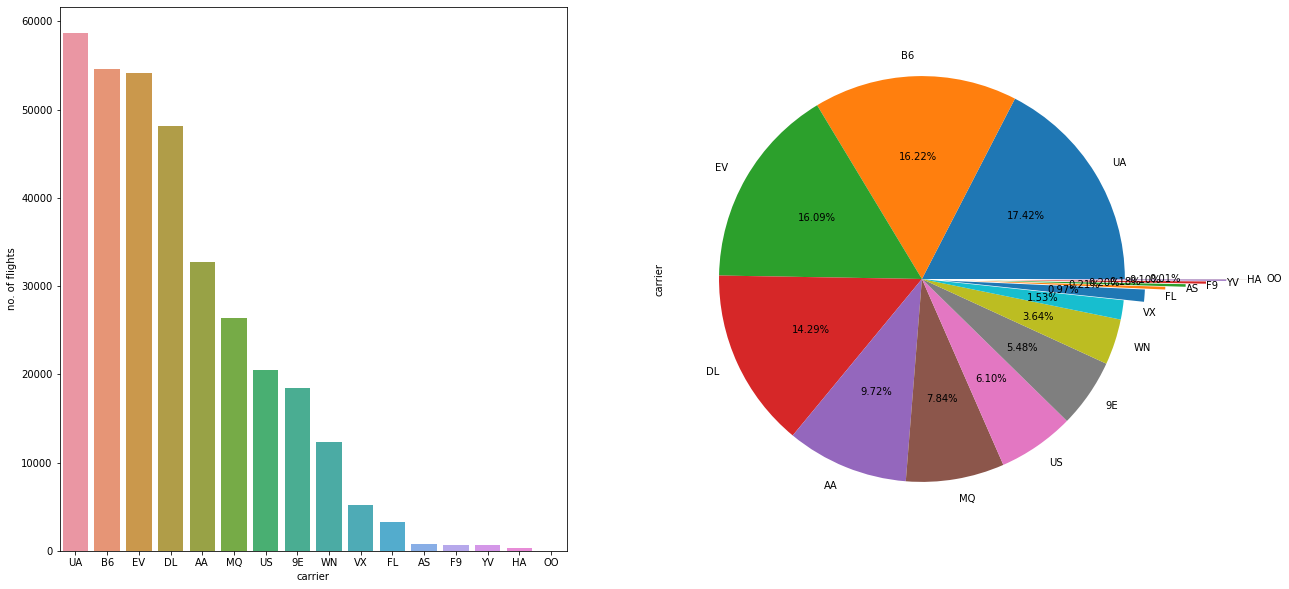

In [ ]:
# Carrier Analysis

df = flight_data.carrier.value_counts()
fig , ax = plt.subplots(1,2,figsize=(20,10))
p = sns.countplot('carrier', order= flight_data.carrier.value_counts().index, data = flight_data, ax = ax[0])
df.plot.pie(ax = ax[1], autopct='%1.2f%%', explode = (0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0.1, 0.2,0.3, 0.4, 0.5, 0.6))
p.set_ylabel('no. of flights')
plt.show()

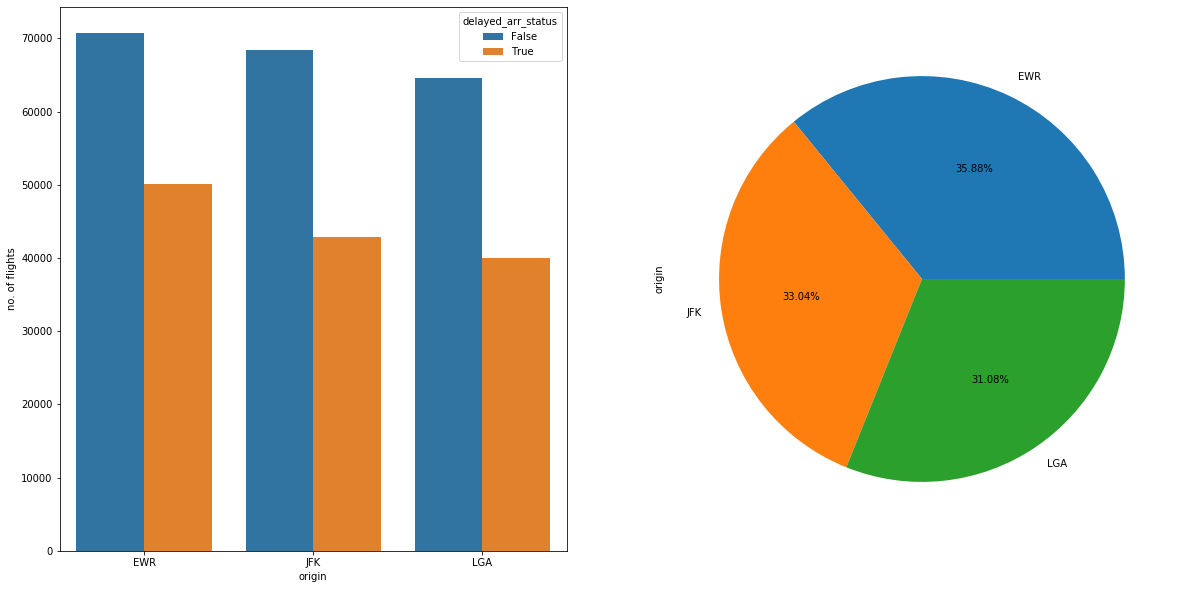

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

In [ ]:
# Origin

df = flight_data.origin.value_counts()
fig , ax = plt.subplots(1,2,figsize=(20,10))
p = sns.countplot('origin', order= flight_data.origin.value_counts().index, data = flight_data, ax = ax[0], hue = 'delayed_arr_status')
df.plot.pie(ax = ax[1], autopct='%1.2f%%')
p.set_ylabel('no. of flights')
plt.show()
df

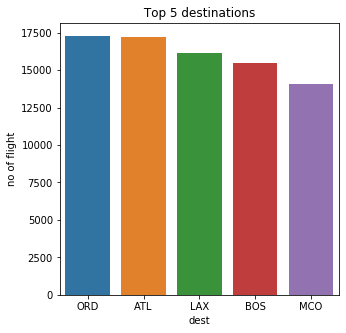

In [ ]:
# Top 5 destinations

df = flight_data.dest.value_counts()
l = df.head(5).index 
df = flight_data[flight_data['dest'].isin(['ORD', 'ATL', 'LAX', 'BOS', 'MCO'])]
plt.figure(figsize= (5,5))
p = sns.countplot( 'dest',  order = l , data = df)
p.set_ylabel("no of flight")
p.set_title(" Top 5 destinations ")
plt.show()

Total Canceled flights 

In [ ]:
# Number of flights got canceled ==>  departure time is not mentioned
print(" Total number of flights got canceled are in year 2013 were : {} ".format(flight_data['dep_time'].isna().sum()) )

 Total number of flights got canceled are in year 2013 were : 8255 


In [ ]:
flight_data.dropna(subset=['dep_time', 'arr_time'], inplace=True)

In [ ]:
# origin_airport_flight_details[ origin_airport_flight_details.dep_delay == origin_airport_flight_details.dep_delay.max() ]
pct = len(flight_data[(flight_data.dep_delay > 0)]) /  len(flight_data) * 100
print("Delayed departure is around {} ".format(round(pct,2)))
pct = (len (flight_data[ (flight_data.arr_delay <= 0) ] ) /  len (flight_data) )  * 100
print("On time Arrival percentage is {} ".format(round(pct,2)))

Delayed departure is around 39.05 
On time Arrival percentage is 59.24 


Top 3 and bottom 3 carries

In [ ]:
flight_data.groupby('carrier').size().sort_values()

carrier
OO       29
HA      342
YV      544
F9      681
AS      712
FL     3181
VX     5127
WN    12075
9E    17345
US    19842
MQ    25076
AA    32059
DL    47746
EV    51251
B6    54137
UA    57916
dtype: int64

% of Dep delay 

In [ ]:
for o in flight_data.origin.unique() :
    delay = len (flight_data[ (flight_data.dep_delay > 0) & (flight_data.origin == o )] ) / len (flight_data[flight_data.origin == o]) 
    print ( 'From Origin Airport {}, flights get delayed by {} %'.format(o, round (delay*100,2)))

From Origin Airport EWR, flights get delayed by 44.78 %
From Origin Airport LGA, flights get delayed by 33.14 %
From Origin Airport JFK, flights get delayed by 38.38 %


% of Arrival delay 

In [ ]:
arr_delay = []
flight_count = []
for o in flight_data.dest.unique() :
    delay = len (flight_data[ (flight_data.arr_delay > 0) & (flight_data.dest == o)]) / len (flight_data[flight_data.dest == o]) 
    arr_delay.append( round (delay*100,2) )
    flight_count.append( len (flight_data[flight_data.dest == o] ) )
#     print ( 'From Destination Airport {}, flight arrival delay is {} %'.format(o, round (delay*100,2)))

# print (arr_delay)

df = pd.DataFrame( { 'dest': flight_data.dest.unique() , 'arr_delay_pct': arr_delay , 'flight_count': flight_count} )


In [ ]:
df.sort_values('flight_count', inplace=True)
df = df[df.flight_count > 50]

In [ ]:
df [ df.arr_delay_pct == df.arr_delay_pct.min()]

,dest,arr_delay_pct,flight_count
98,MVY,27.49,211


Most Longest Route

In [ ]:
longest_flight = flight_data [ flight_data.distance.max() == flight_data.distance ].groupby(['origin', 'dest']).describe()
print("There is {} longest flight".format(len(longest_flight)))
print("from {} to {} ".format ( longest_flight.index[0][0] , longest_flight.index[0][1]))

There is 1 longest flight
from JFK to HNL 


In [ ]:
max_time = flight_data[ flight_data.air_time == flight_data.air_time.max()].arr_time.values[0]
print ( "Max time spent by any flight in air was {} mins".format(max_time))

Max time spent by any flight in air was 1937.0 mins


Max and Min average speed 

In [ ]:
flight_data['speed'] = flight_data.distance/flight_data.air_time * 60
speed =  flight_data.groupby('flight').speed.mean().sort_values(ascending= False).describe()
print(speed)
max_speed = flight_data.groupby('flight').speed.mean().sort_values(ascending= False).values[0]
min_speed = flight_data.groupby('flight').speed.mean().sort_values(ascending= False).values[-1]
print(max_speed)
print(min_speed)

count    3835.000000
mean      381.999895
std        50.482255
min       122.553191
25%       354.067188
50%       390.092363
75%       418.700502
max       502.048193
Name: speed, dtype: float64
502.04819277108436
nan


In [ ]:
d = flight_data[['arr_delay',  'month', 'origin', 'delayed_arr_status']]
d

,arr_delay,month,origin,delayed_arr_status
0,11.0,1,EWR,True
1,20.0,1,LGA,True
2,33.0,1,JFK,True
3,-18.0,1,JFK,False
4,-25.0,1,LGA,False
...,...,...,...,...
336765,-17.0,9,JFK,False
336766,-20.0,9,JFK,False
336767,-16.0,9,JFK,False
336768,1.0,9,JFK,True


In [ ]:
a = d.pivot_table('delayed_arr_status', 'month', 'origin', aggfunc='sum')
a['total'] = a.EWR + a.JFK + a.LGA
a.sort_values(by='total', ascending=False) 

origin,EWR,JFK,LGA,total
month,,,,
12,5509.0,4591.0,4294.0,14394.0
7,4634.0,4898.0,3772.0,13304.0
4,4919.0,3749.0,3854.0,12522.0
6,4573.0,4353.0,3564.0,12490.0
8,4088.0,4094.0,3447.0,11629.0
1,4751.0,3269.0,3130.0,11150.0
3,4307.0,3511.0,3101.0,10919.0
5,4083.0,3194.0,2912.0,10189.0
2,3972.0,3302.0,2826.0,10100.0


Origin Airport Vs Departure Delay Analysis

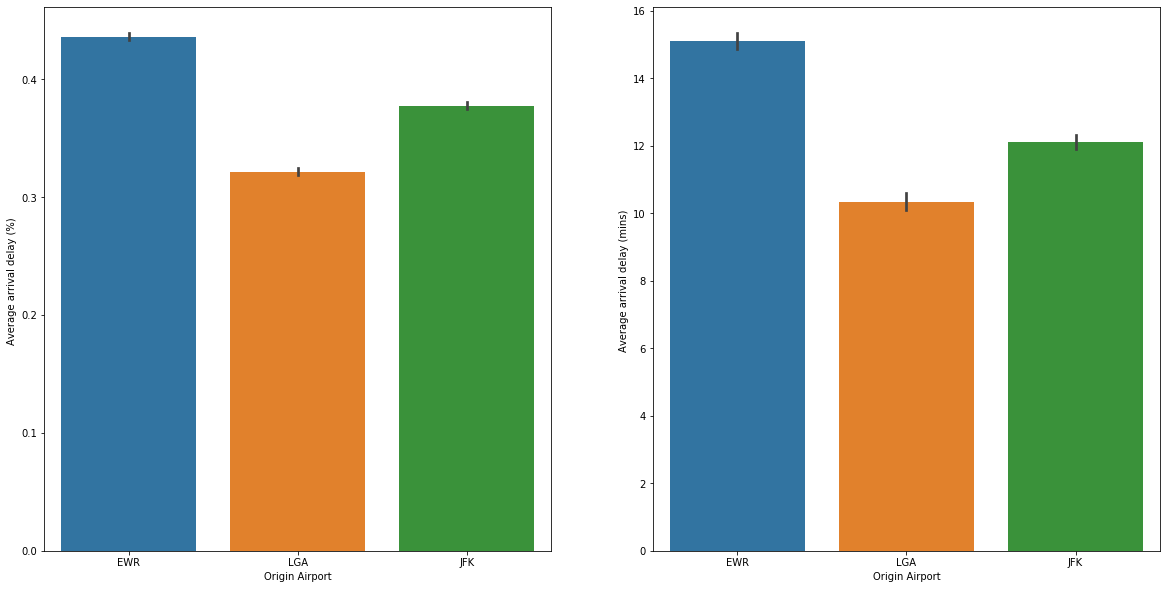

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='origin', y = 'delayed_dep_status',  data = flight_data, ax = ax[0])
ax[0].set_ylabel("Average departure delay (%) ")
ax[0].set_xlabel("Origin Airport")

sns.barplot(x='origin', y = 'dep_delay',  data = flight_data, ax = ax[1])
ax[1].set_ylabel("Average departure delay (mins) ")
ax[1].set_xlabel("Origin Airport")
plt.show()

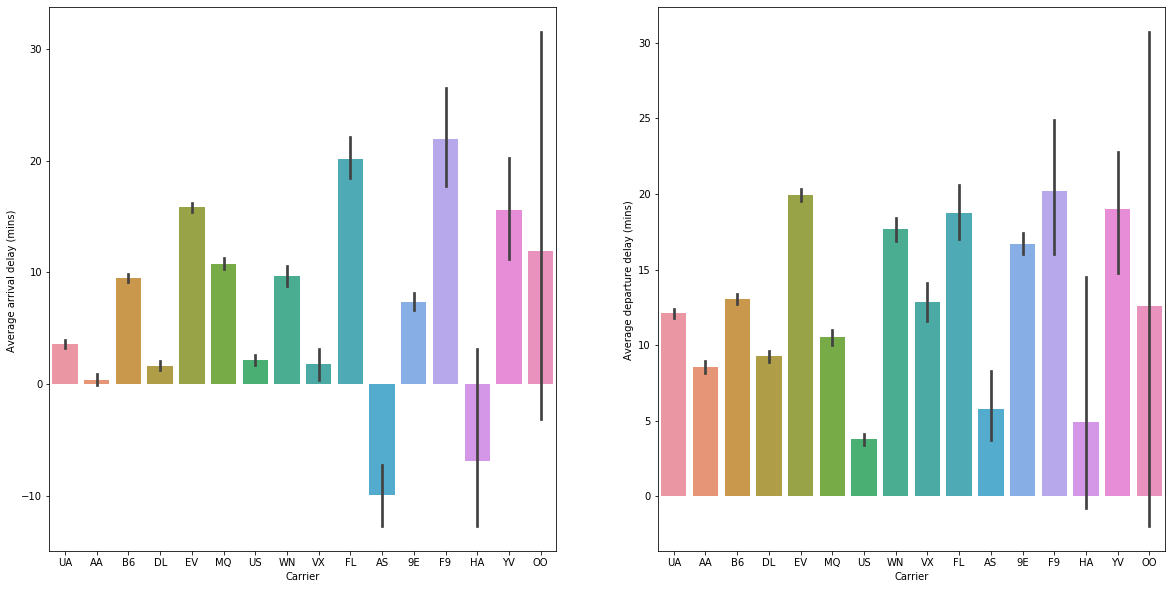

In [ ]:
# Delay Vs Carrier
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.barplot(x='carrier', y = 'arr_delay',  data = flight_data, ax = ax[0])
ax[0].set_ylabel("Average arrival delay (mins) ")
ax[0].set_xlabel("Carrier")

sns.barplot(x='carrier', y = 'dep_delay',  data = flight_data, ax = ax[1])
ax[1].set_ylabel("Average departure delay (mins) ")
ax[1].set_xlabel("Carrier")
plt.show()

In [ ]:
# averge delay on delayed flights
flight_data[flight_data.delayed == 1].dep_delay.mean()

34.53833719286638

Text(0.5, 0, 'Flight is Delayed ?')

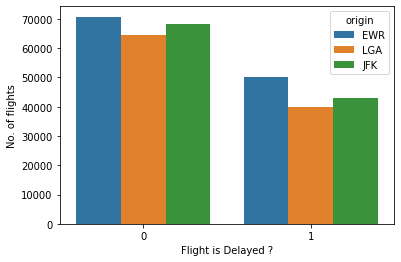

In [ ]:
p = sns.countplot('delayed', hue = 'origin', data=flight_data)
p.set_ylabel("No. of flights")
p.set_xlabel("Flight is Delayed ?")

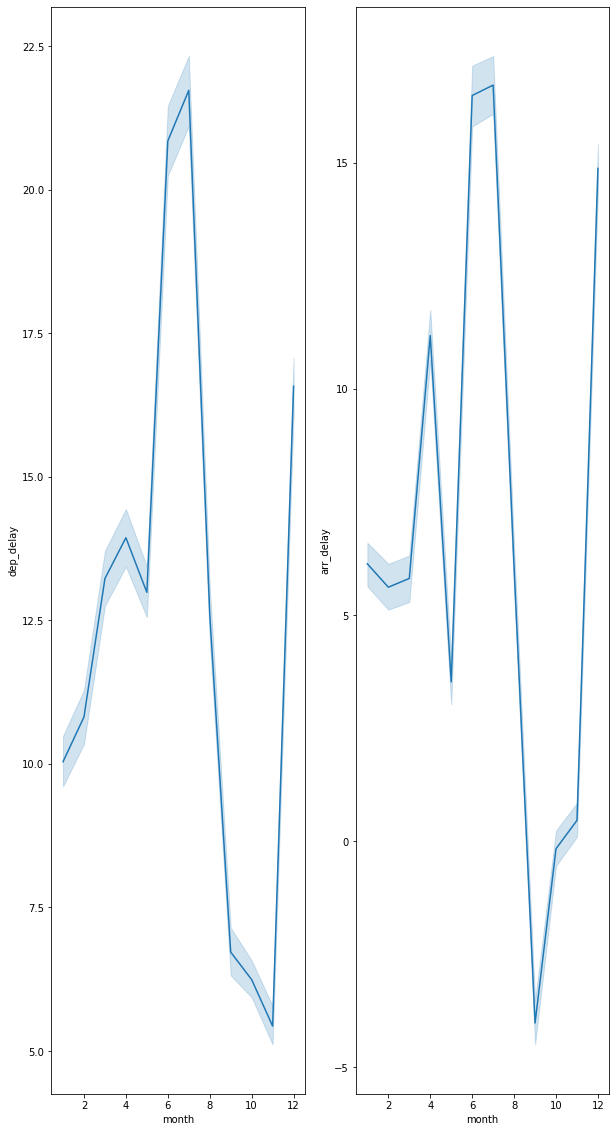

In [ ]:
fig , ax =  plt.subplots(1,2,figsize = (10,20))
sns.lineplot('month', 'arr_delay', data = flight_data, ax = ax[1])
sns.lineplot('month', 'dep_delay', data = flight_data, ax = ax[0])
plt.show()

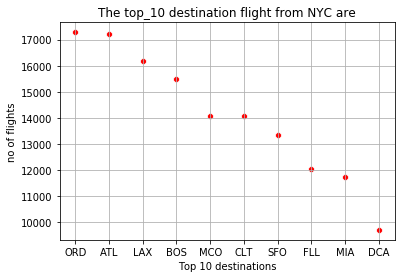

,dest,flight
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


In [ ]:
# Top 10 destination flight from NYC 
dest_count = flight_data.groupby(['dest'],as_index=False).agg({'flight':'count'})
flight_data_top10_dest = dest_count.sort_values(['flight'], ascending=False).head(10)

p = sns.scatterplot( 'dest' , 'flight' , data = flight_data_top10_dest, color = 'r' )
p.set_xlabel("Top 10 destinations")
p.set_ylabel("no of flights")
p.set_title("The top_10 destination flight from NYC are")
plt.grid(True)
plt.show()
flight_data_top10_dest